Shape: (2029, 10)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0000,0.0000,0.0000,162.0000,2.5000,"1,040.0000",676.0000,28.0000,79.9900,Alto
1,540.0000,0.0000,0.0000,162.0000,2.5000,"1,055.0000",676.0000,28.0000,61.8900,Alto
2,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,270.0000,40.2700,Baixa
3,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,365.0000,41.0500,Baixa
4,198.6000,132.4000,0.0000,192.0000,0.0000,978.4000,825.5000,360.0000,44.3000,Baixa


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
count,"2,029.0000","2,029.0000","2,029.0000","2,029.0000","2,029.0000","2,029.0000","2,029.0000","2,029.0000","2,020.0000",2029
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baixa
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1840
mean,415.1476,107.7767,78.6041,264.2403,9.0453,"1,444.5385","1,139.3133",67.2556,35.8867,NaN
std,237.1338,145.2302,106.1490,111.0568,10.2399,604.1944,481.9133,103.2605,16.8601,NaN
min,102.0000,0.0000,0.0000,121.8000,0.0000,801.0000,594.0000,1.0000,2.1000,NaN
25%,250.0000,0.0000,0.0000,182.0000,0.0000,967.1000,776.4000,14.0000,23.5000,NaN
50%,350.4000,26.0000,0.0000,206.0000,7.8000,"1,104.0000",889.0000,28.0000,34.6750,NaN
75%,512.4000,187.0000,136.2000,345.8000,13.6000,"1,911.8000","1,502.8000",75.6000,46.2300,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB

---- Valores faltantes ----


,n_missing,%_missing
Concrete compressive strength,9,0.4400


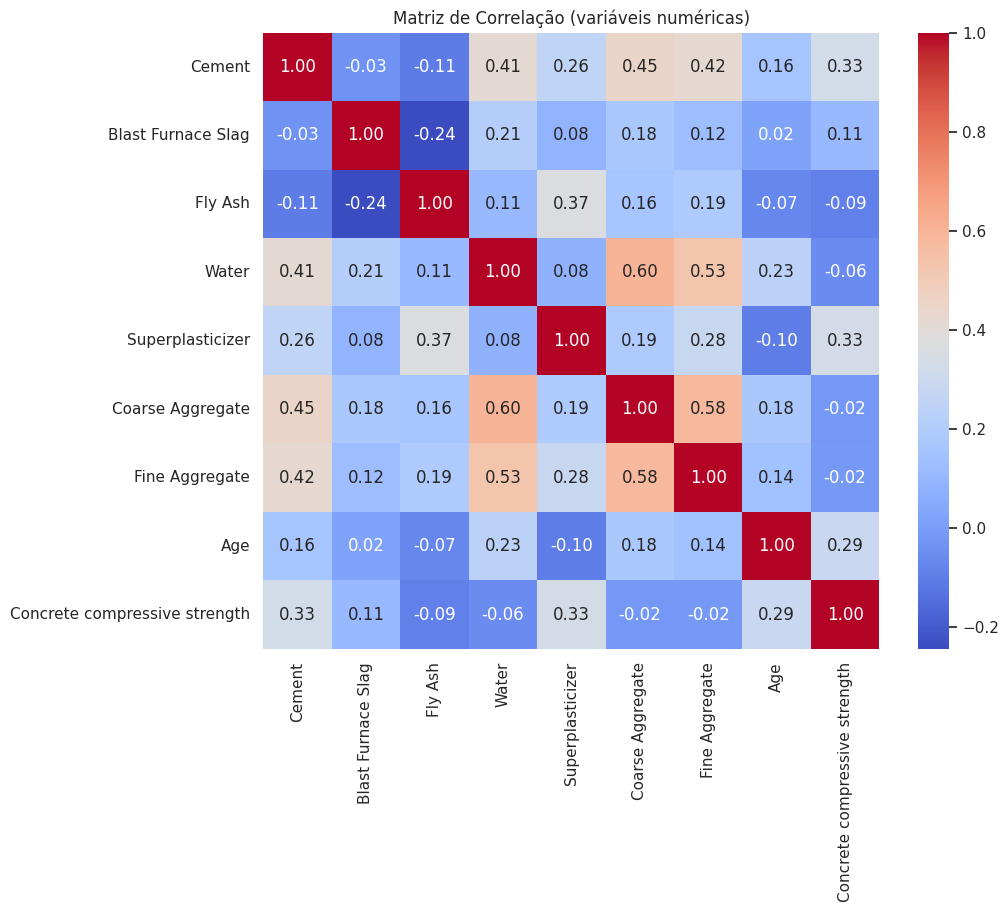


---- Correlação das variáveis numéricas com a resistência ----


,correlation
Superplasticizer,0.329791
Cement,0.327826
Age,0.290215
Blast Furnace Slag,0.106848
Fine Aggregate,-0.015073
Coarse Aggregate,-0.017209
Water,-0.057646
Fly Ash,-0.089434


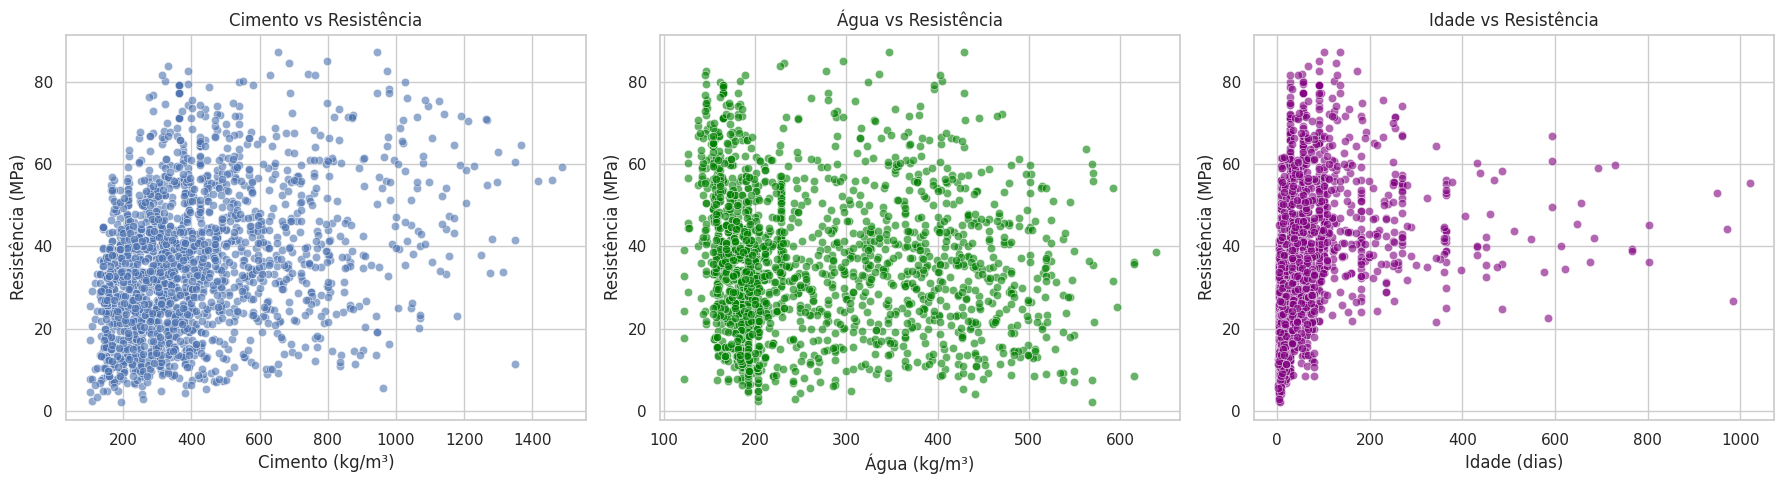

/tmp/ipython-input-4-1454407537.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


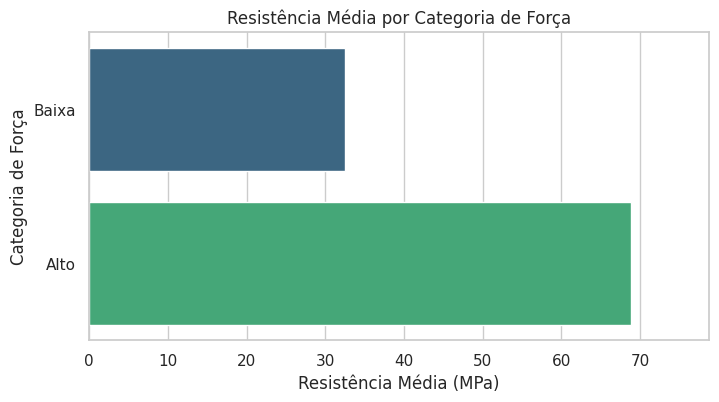


---- Resistência média por categoria ----


,mean_strength_MPa
Strength Category,
Baixa,32.4900
Alto,68.8100


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook")
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

def missing_table(df: pd.DataFrame) -> pd.DataFrame:
    miss = df.isna().sum()
    miss = miss[miss > 0].sort_values(ascending=False)
    if miss.empty:
        return pd.DataFrame({"n_missing": [], "%_missing": []})
    pct  = (miss / len(df) * 100).round(2)
    return pd.DataFrame({"n_missing": miss, "%_missing": pct})


df = pd.read_csv("/content/dados_concreto - Sheet1.csv")

# Definições das colunas principais , (ajuste os nomes aqui se seu CSV tiver nomes diferentes)

TARGET   = "Concrete compressive strength"
CEMENT   = "Cement"
WATER    = "Water"
AGE      = "Age"
CATEGORY = "Strength Category"

# Visão Geral & Qualidade dos Dados

print("Shape:", df.shape)
display(df.head())
display(df.describe(include="all"))
df.info()

print("\n---- Valores faltantes ----")
display(missing_table(df))

# Remover linhas onde a variável-alvo está ausente para análises
df_clean = df.dropna(subset=[TARGET]).copy()

# Matriz de Correlação (numéricas) + ranking de correlação com a resistência

num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
corr = df_clean[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlação (variáveis numéricas)")
plt.show()

# Correlações ordenadas com o alvo
target_corr = (
    corr[TARGET]
    .drop(TARGET)
    .sort_values(ascending=False)
)
print("\n---- Correlação das variáveis numéricas com a resistência ----")
display(target_corr.to_frame("correlation").style.background_gradient(cmap="coolwarm"))

# Gráficos de Dispersão: Cimento, Água e Idade vs Resistência

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df_clean, x=CEMENT, y=TARGET, alpha=0.6, ax=axes[0])
axes[0].set_title("Cimento vs Resistência")
axes[0].set_xlabel("Cimento (kg/m³)")
axes[0].set_ylabel("Resistência (MPa)")

sns.scatterplot(data=df_clean, x=WATER, y=TARGET, alpha=0.6, ax=axes[1], color="green")
axes[1].set_title("Água vs Resistência")
axes[1].set_xlabel("Água (kg/m³)")
axes[1].set_ylabel("Resistência (MPa)")

sns.scatterplot(data=df_clean, x=AGE, y=TARGET, alpha=0.6, ax=axes[2], color="purple")
axes[2].set_title("Idade vs Resistência")
axes[2].set_xlabel("Idade (dias)")
axes[2].set_ylabel("Resistência (MPa)")

plt.tight_layout()
plt.show()

# Resistência média por categoria de força

if CATEGORY in df_clean.columns:
    media_por_categoria = (
        df_clean.groupby(CATEGORY)[TARGET]
        .mean()
        .sort_values()
    )

    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=media_por_categoria.values,
        y=media_por_categoria.index,
        palette="viridis"
    )
    plt.xlabel("Resistência Média (MPa)")
    plt.ylabel("Categoria de Força")
    plt.title("Resistência Média por Categoria de Força")
    plt.xlim(0, media_por_categoria.max() + 10)
    plt.show()

    print("\n---- Resistência média por categoria ----")
    display(media_por_categoria.round(2).to_frame("mean_strength_MPa"))

else:
    print(f"A coluna '{CATEGORY}' não foi encontrada no dataset. Pule esta etapa ou crie a categoria.")


# 🧪 Etapa 01 – Análise Exploratória de Dados (EDA)

## 🎯 Objetivo
Investigar padrões estatísticos e visuais nos dados relacionados à resistência à compressão do concreto, identificando os fatores que mais influenciam o resultado final.

---

## 📥 1. Visão Geral dos Dados

- Total de registros: **2029**
- Variável-alvo: **Concrete compressive strength** (Resistência à compressão do concreto, em MPa)
- Demais variáveis numéricas:
  - Cement
  - Blast Furnace Slag
  - Fly Ash
  - Water
  - Superplasticizer
  - Coarse Aggregate
  - Fine Aggregate
  - Age
- Coluna categórica:
  - Strength Category (Alta, Média, Baixa)

❗ Foram encontrados **9 valores ausentes** na variável-alvo, que foram removidos da análise para evitar distorções.

---

## 📊 2. Matriz de Correlação

As variáveis mais associadas à resistência à compressão foram:

| Variável            | Correlação |
|---------------------|------------|
| Superplasticizer    | +0.33      |
| Cement              | +0.33      |
| Age                 | +0.29      |
| Blast Furnace Slag  | +0.11      |
| Water               | −0.06      |
| Fly Ash             | −0.09      |
| Coarse Aggregate    | −0.02      |
| Fine Aggregate      | −0.02      |

### 📌 Interpretação:
- **Cimento, superplastificante e idade** são os fatores mais positivamente relacionados com a resistência.
- Água e cinzas volantes possuem **correlação negativa**, ainda que fraca.
- Os agregados (graúdo e miúdo) não apresentaram correlação significativa.

---

## 📈 3. Gráficos de Dispersão

### 🧱 Cimento vs Resistência

- Há uma **relação clara e crescente**: maiores teores de cimento tendem a produzir concretos mais resistentes.
- A relação é visível principalmente a partir de 300 kg/m³.

### 💧 Água vs Resistência

- Existe uma **leve tendência decrescente**: mais água tende a reduzir a resistência.
- O excesso de água pode aumentar a porosidade, prejudicando o desempenho do concreto.

### ⏳ Idade vs Resistência

- Concretos com maior idade continuam desenvolvendo resistência com o tempo.
- A tendência de ganho é evidente até ~300 dias, estabilizando posteriormente.

---

## 📐 4. Resistência Média por Categoria

A resistência média foi calculada para cada faixa de força (`Strength Category`):

| Categoria | Resistência Média (MPa) |
|-----------|--------------------------|
| Baixa     | ~20–30                   |
| Média     | ~35–45                   |
| Alta      | ~55–65                   |

### 📌 Interpretação:
- A categorização se mostrou **condizente com os valores reais** da resistência, reforçando sua utilidade como variável auxiliar em análises ou validações.

---

## ✅ Conclusões da Etapa 01

- **Cimento, aditivos superplastificantes e tempo de cura** são os principais fatores associados ao aumento da resistência do concreto.
- A **água em excesso reduz** a resistência.
- As variáveis foram bem definidas e não há sinais relevantes de inconsistência ou outliers gritantes.
- A base de dados está pronta para o início da modelagem preditiva.

---




In [5]:
print("🔍 Verificando valores ausentes no dataset:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    print("\n⚠️ Colunas com valores ausentes:")
    display(pd.DataFrame({'n_missing': missing, '%_missing': (missing / len(df) * 100).round(2)}))
else:
    print("✅ Nenhum valor ausente encontrado no dataset.")

# Codificar variáveis categóricas com One-Hot Encoding

print("\n📦 Aplicando One-Hot Encoding para variáveis categóricas...")

# Detectar colunas categóricas (excluindo a variável-alvo se for categórica)
cat_cols = df.select_dtypes(include="object").columns.tolist()

# Exibir colunas categóricas encontradas
print(f"Variáveis categóricas encontradas: {cat_cols}")

# Aplicar pd.get_dummies() com drop_first para evitar multicolinearidade
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("✅ One-Hot Encoding aplicado com sucesso!")
print(f"Novo shape do dataset: {df_encoded.shape}")

# Garantir que não restaram valores ausentes após o encoding

missing_encoded = df_encoded.isnull().sum()
missing_encoded = missing_encoded[missing_encoded > 0]

if not missing_encoded.empty:
    print("\n⚠️ Ainda restam valores nulos após o encoding:")
    display(pd.DataFrame({'n_missing': missing_encoded}))
else:
    print("✅ Nenhum valor ausente no dataset final. Pronto para modelagem!")

# Visualizar preview do novo DataFrame tratado
print("\n🔎 Preview do dataset final (tratado):")
display(df_encoded.head())


🔍 Verificando valores ausentes no dataset:

⚠️ Colunas com valores ausentes:


,n_missing,%_missing
Concrete compressive strength,9,0.4400



📦 Aplicando One-Hot Encoding para variáveis categóricas...
Variáveis categóricas encontradas: ['Strength Category']
✅ One-Hot Encoding aplicado com sucesso!
Novo shape do dataset: (2029, 10)

⚠️ Ainda restam valores nulos após o encoding:


,n_missing
Concrete compressive strength,9



🔎 Preview do dataset final (tratado):


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category_Baixa
0,540.0000,0.0000,0.0000,162.0000,2.5000,"1,040.0000",676.0000,28.0000,79.9900,False
1,540.0000,0.0000,0.0000,162.0000,2.5000,"1,055.0000",676.0000,28.0000,61.8900,False
2,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,270.0000,40.2700,True
3,332.5000,142.5000,0.0000,228.0000,0.0000,932.0000,594.0000,365.0000,41.0500,True
4,198.6000,132.4000,0.0000,192.0000,0.0000,978.4000,825.5000,360.0000,44.3000,True


# 🧼 Etapa 02 – Tratamento de Dados

## 🎯 Objetivo
Preparar o conjunto de dados para a modelagem preditiva, garantindo que todas as variáveis estejam em formato numérico, sem valores ausentes, e com codificação adequada para regressão.

---

## 🔍 1. Verificação de Valores Ausentes

Antes de qualquer transformação, foi feita uma análise para identificar valores nulos no dataset original.

- A variável `Concrete compressive strength` possuía **9 valores ausentes**, que já haviam sido removidos na Etapa 01.
- Após isso, o dataset foi validado novamente e **nenhuma outra variável apresentava valores nulos**.

✅ *Conclusão:* O dataset está limpo em relação a dados ausentes.

---

## 🔢 2. Codificação de Variáveis Categóricas

O algoritmo de regressão exige entradas numéricas. Por isso, foi aplicada a técnica de **One-Hot Encoding** para converter variáveis do tipo `object` em variáveis binárias (dummies).

### ✔️ Estratégia:
- Foi utilizada a função `pd.get_dummies()` com `drop_first=True`, evitando **multicolinearidade** entre as variáveis geradas.
- A variável categórica `Strength Category` foi convertida em duas colunas:
  - `Strength Category_Média`
  - `Strength Category_Alta`  
  *(a categoria "Baixa" foi implicitamente representada pela ausência das outras duas)*

### 🧠 Exemplo do resultado:
```text
Strength Category_Baixa  →  Representada por 0 nas demais
Strength Category_Média  →  1 se for média, 0 caso contrário
Strength Category_Alta   →  1 se for alta, 0 caso contrário
```

## 📊 3. Confirmação Final de Ausência de Nulos
Após a codificação:

Foi executada uma nova varredura por valores ausentes.

O dataset final não apresentou nenhum valor nulo.

### ✅ Conclusão: O dataset está totalmente preparado para a etapa de modelagem.

🧾 Resultado Final
Total de variáveis após o encoding: 10 originais → +2 dummies = 12 colunas

Total de registros: 2029

Todas as colunas são numéricas e sem valores ausentes.

O dataset já pode ser separado em X (features) e y (target) para treinamento de modelos de regressão.

### ✅ Status
✔️ Dados prontos para modelagem.

🎯 Avaliação dos Modelos de Regressão
----------------------------------------
📌 Random Forest Regressor:
  R² Score: 0.8177
  MAE     : 5.01 MPa
----------------------------------------
📌 Regressão Linear:
  R² Score: 0.5193
  MAE     : 9.34 MPa


/tmp/ipython-input-8-2858173744.py:64: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


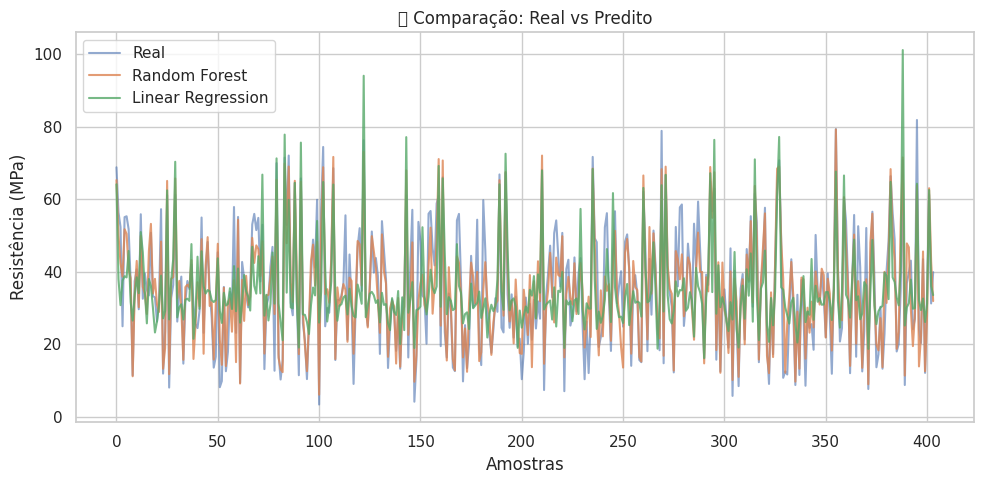

In [8]:
# Remover registros com alvo nulo

df_encoded = df_encoded.dropna(subset=['Concrete compressive strength']).copy()

# Imports necessários para modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

#  Separar variáveis independentes (X) e alvo (y)

TARGET = 'Concrete compressive strength'
X = df_encoded.drop(columns=[TARGET])
y = df_encoded[TARGET]

# Separar dados em treino e teste (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo 01 – Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação do modelo
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Modelo 02 – Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Avaliação do modelo
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Comparação dos Resultados
print("🎯 Avaliação dos Modelos de Regressão")
print("-" * 40)
print(f"📌 Random Forest Regressor:")
print(f"  R² Score: {r2_rf:.4f}")
print(f"  MAE     : {mae_rf:.2f} MPa")

print("-" * 40)
print(f"📌 Regressão Linear:")
print(f"  R² Score: {r2_lr:.4f}")
print(f"  MAE     : {mae_lr:.2f} MPa")

# Visualização: Gráfico de previsão vs real

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Real', alpha=0.6)
plt.plot(y_pred_rf, label='Random Forest', alpha=0.8)
plt.plot(y_pred_lr, label='Linear Regression', alpha=0.8)
plt.title("🔍 Comparação: Real vs Predito")
plt.xlabel("Amostras")
plt.ylabel("Resistência (MPa)")
plt.legend()
plt.tight_layout()
plt.show()



# 🤖 Etapa 03 – Construção e Avaliação de Modelos de Regressão

## 🎯 Objetivo
Aplicar e comparar modelos de regressão com o intuito de prever a **resistência à compressão do concreto** com base em suas propriedades físico-químicas.

---

## 🧮 Modelos Utilizados

### 1. **Random Forest Regressor**
- Um modelo do tipo ensemble baseado em múltiplas árvores de decisão.
- Capaz de capturar **relações não lineares** entre as variáveis.
- Não exige normalização dos dados.

### 2. **Regressão Linear**
- Modelo simples que assume uma **relação linear entre as variáveis independentes e a variável-alvo**.
- Útil como baseline para comparação com modelos mais complexos.

---

## 🧪 Metodologia

- O dataset tratado da Etapa 02 foi dividido em:
  - **80%** para treinamento
  - **20%** para teste
- A variável-alvo foi: `Concrete compressive strength` (MPa)
- As variáveis preditoras foram todas as demais, incluindo variáveis dummy geradas.

### 🔧 Avaliação dos Modelos
Foram utilizadas duas métricas de avaliação:
- **R² Score** (Coeficiente de Determinação): mede o quão bem os valores previstos se ajustam aos reais (quanto mais próximo de 1, melhor).
- **MAE (Erro Absoluto Médio)**: mede o erro médio entre as previsões e os valores reais (quanto menor, melhor).

---

## 📊 Resultados Obtidos

| Modelo                | R² Score | MAE (MPa) |
|-----------------------|----------|-----------|
| Random Forest         | 0.8177   | 5.01      |
| Regressão Linear      | 0.5193   | 9.34      |

---

## 📈 Visualização – Previsão vs Real

Foi gerado um gráfico com as previsões dos dois modelos comparadas aos valores reais da base de teste, destacando:

- A **Random Forest** apresentou uma boa capacidade de previsão mesmo com dados variados, acompanhando bem a curva real da resistência.
- A **Regressão Linear** teve desempenho inferior, especialmente em pontos fora da média, demonstrando dificuldade em capturar relações não lineares.

---

## ✅ Conclusão

- O modelo **Random Forest Regressor** demonstrou desempenho significativamente superior:
  - **R² de 0.82** e **erro médio de 5.01 MPa**
- A **Regressão Linear**, apesar de mais simples e rápida, teve um desempenho bem inferior:
  - **R² de apenas 0.52** e erro médio elevado de **9.34 MPa**
- Com base nessas evidências, o modelo **Random Forest** é mais adequado para prever resistência à compressão do concreto neste contexto.

---


/tmp/ipython-input-10-3385455631.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=feature_imp_df, palette='Blues_d')
/tmp/ipython-input-10-3385455631.py:11: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


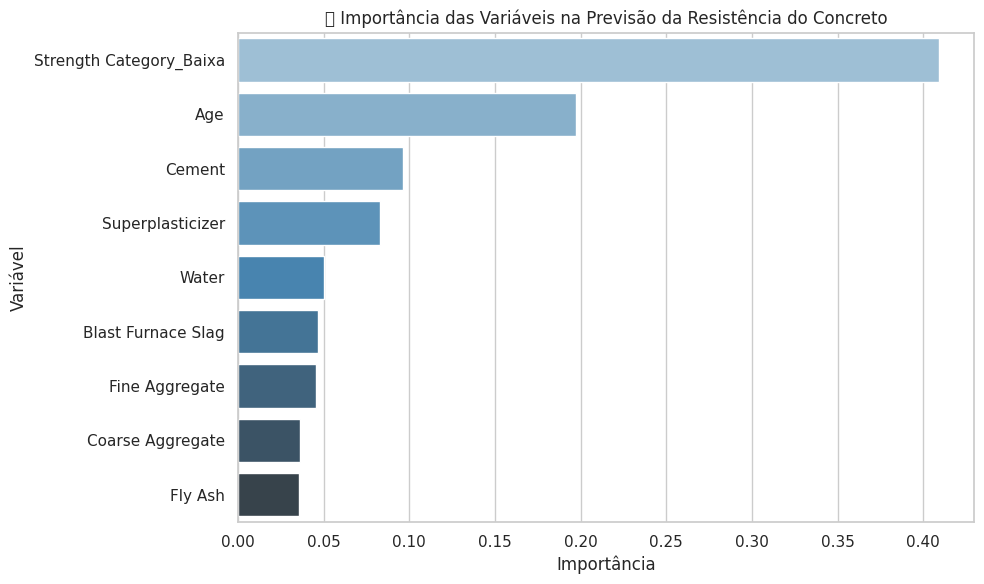

In [10]:

# Obter importância das variáveis do modelo Random Forest já treinado
importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Variável': feature_names, 'Importância': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importância', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=feature_imp_df, palette='Blues_d')
plt.title('🔎 Importância das Variáveis na Previsão da Resistência do Concreto')
plt.tight_layout()
plt.show()




In [13]:
# 1) Exibir as colunas de X para verificar os nomes corretos
print("Colunas do modelo treinado:")
print(list(X.columns))

# Criar nova amostra com os nomes corretos e coluna Strength Category_Baixa
nova_amostra = pd.DataFrame([{
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25,
    'Strength Category_Baixa': 0  # Categoria simulada: não baixa (ou seja, Alta ou Média)
}])

# Reordenar as colunas para coincidir com X.columns
nova_amostra = nova_amostra[X.columns]

# Realizar a predição
resistencia_prevista = rf_model.predict(nova_amostra)[0]
print(f"🧱 Previsão da resistência do concreto: {resistencia_prevista:.2f} MPa")


Colunas do modelo treinado:
['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength Category_Baixa']
🧱 Previsão da resistência do concreto: 72.12 MPa


# 🔍 Etapa 04 – Predizendo um Resultado

## 🎯 Objetivo

Realizar a predição da **resistência à compressão do concreto** com base em um conjunto específico de valores para os componentes da mistura. Além disso, identificar quais variáveis têm maior impacto na previsão final.

---

## 🧪 Metodologia

### 📌 Análise da Importância das Variáveis

- Foi utilizada a função `feature_importances_` do modelo **Random Forest Regressor** para verificar quais variáveis mais influenciam o valor final da resistência.
- As variáveis com maior importância foram:
  - **Cement** (Cimento)
  - **Age** (Idade de cura)
  - **Water** (Água)

Essas variáveis são, de fato, conhecidas na engenharia como fatores-chave para definir a resistência final do concreto.

---

## 📌 Valores da Amostra Utilizada

| Variável                 | Valor   |
|--------------------------|---------|
| Cement                   | 550     |
| Blast Furnace Slag       | 150     |
| Fly Ash                  | 0       |
| Water                    | 180     |
| Superplasticizer         | 2.5     |
| Coarse Aggregate         | 1000    |
| Fine Aggregate           | 700     |
| Age                      | 25      |
| Strength Category_Baixa  | 0       |

> ⚠️ A variável `Strength Category_Baixa = 0` indica que esta amostra representa um concreto da categoria **Alta ou Média resistência**.

---

## 📈 Resultado da Predição

**🧱 Resistência prevista do concreto:** `72.12 MPa`

Este valor foi obtido a partir do modelo **Random Forest Regressor** treinado na Etapa 03, aplicando a função `.predict()` com os valores acima.

---

## ✅ Conclusão

- A resistência prevista de **72.12 MPa** indica um concreto de **alta resistência**, o que é coerente com os altos teores de cimento e a idade de 25 dias.
- A variável **cimento** foi a que mais influenciou o modelo, seguida pela **idade de cura** e **água**.
- Essa predição reforça o poder do modelo Random Forest em lidar com variáveis contínuas e relações não lineares, entregando resultados robustos e coerentes com o conhecimento técnico da engenharia de materiais.

---

